In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import universe
from universe import NAMES

%matplotlib inline

In [ ]:
for i in range(30):
    path = ('log/log'+str(i)+'/')
    if not os.path.exists(path):
        os.mkdir(path)
    u = universe.Universe(logpath=path)
    u.start_sim()

Initialization done.
Clear old logs done.
Sim begin
YEAR: 0
dead num: 0
battle num: 0 

YEAR: 100
dead num: 2
battle num: 822 

YEAR: 200
dead num: 6
battle num: 1300 



In [350]:
# Basic Operation Definition

log_path = 'log/log/'
def get_end_year():
    def _get_title(x):
        ans = x.split('_')[0]
        if ans.isdecimal():
            return int(ans)
        return 0
    return max(list(map(_get_title, os.listdir(log_path))))

def get_year_df(year, is_civ=True):
    if is_civ:
        df = pd.read_csv('%s%d_%s.csv'%(log_path, year, 'civ'), index_col=False)
        df['oclnum'] = df.ocl.map(lambda x: len(x) if x is not np.NAN else 0)
    else:
        df = pd.read_csv('%s%d_%s.csv'%(log_path, year, 'galaxy'), index_col=False)
    return df

def get_pos():
    pos = pd.read_csv(log_path + 'pos.csv')
    pos.columns = ["x", "y"]
    return pos

def sim():
    uv = universe.Universe()
    uv.start_sim()

end_year = get_end_year()
gl_begin = get_year_df(0, is_civ=False)
gl_mid = get_year_df(end_year//2, is_civ=False)
gl_end = get_year_df(end_year, is_civ=False)
pos = get_pos()
df_begin = get_year_df(0)
df_end = get_year_df(end_year)
def print_attr_info():
    print("模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}")
    print(df_begin.attr.value_counts())
    print("模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}")
    print(df_end[df_end.mlb!=0].attr.value_counts())
        


In [358]:
from math import isnan
# visualization

def get_type_color(galaxy, civ):
    colors = []
    alpha = []
    cls = [[20,220,20], [220,20,20], [20,20,220], [220,220,220]]
    for row in galaxy.belong_to:
        if row is None or row is np.nan:
            colors.append(cls[3])
            alpha.append(0.2)
            continue
        try:
            colors.append(cls[civ.attr[row]])
            alpha.append(1)
        except TypeError:
            alpha.append(0.2)
            colors.append(cls[3])
    return np.array(colors) / 256
def plot_map(gl, civ, mask=None, plotsize=20, alpha=0.7):
    print("红色为战斗文明，绿色为交好文明， 蓝色为保守文明。灰色为未被占领地")
    if mask is None:
        colors = get_type_color(gl, civ)
        return sns.plt.scatter(pos.x, pos.y, c=colors, alpha=alpha, s=plotsize+4)
    else:
        colors = get_type_color(gl[mask], civ)
        return sns.plt.scatter(pos[mask].x, pos[mask].y, c=colors, alpha=alpha, s=plotsize+4)

def plot_range(gl, civ, alive=True):
    mask = np.logical_not(gl.belong_to.isnull()) if alive else None
    return plot_map(gl, civ, mask=mask, plotsize=gl.dtrange, alpha=0.3)

def plot_time_info(year, ret=False, alive=True):
    """输出侦测范围"""
    civ = pd.read_csv(log_path+'%d_civ.csv' % (year, ), index_col=False)
    gl = pd.read_csv(log_path+'%d_galaxy.csv' % (year, ), index_col=False)
    plot_range(gl, civ, alive=alive)
    if ret:
        return civ, gl
    
def plot_info(year, plot_type='oclnum'):
    civ = get_year_df(year, is_civ=True)
    gl = get_year_df(year, is_civ=False)
    def get(name):
        def f(x):
            try:
                return civ.ix[int(x), name]
            except:
                return 0
        return f
    if plot_type == 'oclnum':
        capitals = civ.ocl.map(lambda x: eval(x)[0] if x is not np.NAN and x is not None else 0)
        size = gl.belong_to.map(get('oclnum'))
        mask = np.bool8(np.zeros_like(size))
        for i in capitals:
            mask[i] = True
        sns.plt.title("Occupied Galaxies Number")
        print('每一个点为一个文明，范围大小表示星系数量')
        return plot_map(gl, civ, mask=mask, plotsize=size)
    elif 'ml' in plot_type:
        capitals = civ.ocl.map(lambda x: eval(x)[0] if x is not np.NAN and x is not None else 0)
        size = gl.belong_to.map(get('mlst'))
        mask = np.bool8(np.zeros_like(size))
        for i in capitals:
            mask[i] = True
        sns.plt.title(str(year) + "Occupied Galaxies Number")
        print('每一个点为一个文明，范围大小表示军事力量')
        return plot_map(gl, civ, mask=mask, plotsize=size)

In [359]:
df = get_year_df(end_year)

In [360]:
df[df.attr!=1]

,name,mlb,btTch,dfTch,ocl,attr,pd,mlst,know_num,allies_num,enemies_num,oclnum
0,0,1,1.0,41034.161945,"[0, 592, 908, 205, 730, 732, 876, 426, 8, 854,...",2,2237.101649,715.304922,917,0,1,86
1,1,0,1.0,12210.188742,NaN,2,0.000000,0.000000,0,0,0,0
5,5,0,1.0,26536.003179,NaN,2,0.000000,0.000000,0,0,0,0
7,7,0,1.0,12210.188742,NaN,2,0.000000,0.000000,0,0,0,0
8,8,1,1.0,21763.283155,"[402, 653, 587, 810, 731, 431, 135, 113, 95, 1...",2,1118.550824,426.829658,831,0,1,74
10,10,0,1.0,1165.751531,NaN,0,0.000000,0.000000,0,0,0,0
11,11,0,1.0,10611.733985,NaN,2,0.000000,0.000000,0,0,0,0
12,12,0,1.0,38767.580098,NaN,2,0.000000,0.000000,0,0,0,0
13,13,0,1.0,11104.062478,NaN,0,0.000000,0.000000,0,0,0,0
14,14,1,1.0,60186.152040,"[14, 259, 412, 589, 557, 891, 896, 650, 948, 5...",0,3355.652473,21.440912,891,23,1,92


In [361]:
df[df.attr == 1]

,name,mlb,btTch,dfTch,ocl,attr,pd,mlst,know_num,allies_num,enemies_num,oclnum
2,2,0,374.152016,1.0,NaN,1,0.000000,0.000000,0,0,0,0
3,3,0,281.657980,1.0,NaN,1,0.000000,0.000000,0,0,0,0
4,4,0,3131.209499,1.0,NaN,1,0.000000,0.000000,0,0,0,0
6,6,0,345.922878,1.0,NaN,1,0.000000,0.000000,0,0,0,0
9,9,0,712.272557,1.0,NaN,1,0.000000,0.000000,0,0,0,0
16,16,0,312.689165,1.0,NaN,1,0.000000,0.000000,0,0,0,0
17,17,0,359.851853,1.0,NaN,1,0.000000,0.000000,0,0,0,0
20,20,0,210.682998,1.0,NaN,1,0.000000,0.000000,0,0,0,0
29,29,0,247.209829,1.0,NaN,1,0.000000,0.000000,0,0,0,0
34,34,0,411.561585,1.0,NaN,1,0.000000,0.000000,0,0,0,0


In [362]:
print_attr_info()
print('end at %d year' % (end_year, ))

模拟开始时，三类属性分布为:{0:结盟型,1:好战性,2:保守型}
2    37
1    32
0    31
Name: attr, dtype: int64
模拟结束时，三类属性分布为：{0:结盟型,1:好战性,2:保守型}
2    9
1    1
0    1
Name: attr, dtype: int64
end at 542 year


每一个点为一个文明，范围大小表示军事力量
红色为战斗文明，绿色为交好文明， 蓝色为保守文明。灰色为未被占领地
红色为战斗文明，绿色为交好文明， 蓝色为保守文明。灰色为未被占领地


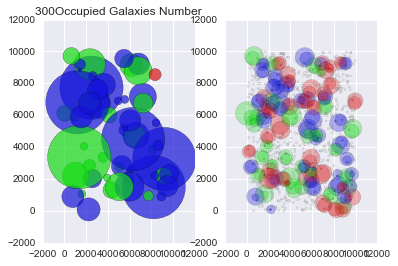

In [363]:
sns.plt.subplot(1,2,1)
plot_info(300, plot_type='mlst')
sns.plt.subplot(1,2,2)
plot_time_info(2, alive=False)

每一个点为一个文明，范围大小表示星系数量
红色为战斗文明，绿色为交好文明， 蓝色为保守文明。灰色为未被占领地


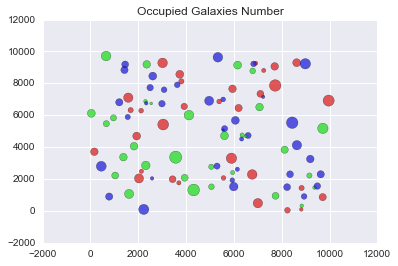

In [364]:
plot_info(40, plot_type='oclnum')